In [1]:
#Downloading relevant libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Importing data. Baseline = no waste collection at home. Experiment = waste collection at home
baseline_data_init = pd.read_csv('Final BASELINE-table.csv' , skiprows=6)
experiment_data_init = pd.read_csv('Final Experiment-table.csv' , skiprows=6)

In [4]:
baseline_data_init.head(3)

,[run number],Technology,Separation-at-home,nmbr-weeks-pickup-pmd,general-regionbin-size,number-of-households,nmbr-weeks-pickup-gen,pmd-regionbin-size,[step],recycle-ratio,mean [bin-satisfaction] of households,average-r
0,3,Basic,False,2,100,26,1,200,0,0.0,0.8,1.546154
1,4,Basic,False,2,100,26,1,200,0,0.0,0.8,1.457692
2,1,Basic,False,2,100,26,1,200,0,0.0,0.8,1.623077


In [5]:
baseline_data_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399744 entries, 0 to 399743
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   [run number]                           399744 non-null  int64  
 1   Technology                             399744 non-null  object 
 2   Separation-at-home                     399744 non-null  bool   
 3   nmbr-weeks-pickup-pmd                  399744 non-null  int64  
 4   general-regionbin-size                 399744 non-null  int64  
 5   number-of-households                   399744 non-null  int64  
 6   nmbr-weeks-pickup-gen                  399744 non-null  int64  
 7   pmd-regionbin-size                     399744 non-null  int64  
 8   [step]                                 399744 non-null  int64  
 9   recycle-ratio                          399744 non-null  float64
 10  mean [bin-satisfaction] of households  399744 non-null  

In [6]:
#Renaming columns
baseline_data_init.rename(columns={'[run number]':'run_number','[step]':'tick' , 'mean [bin-satisfaction] of households': 'avg bin-satisfaction'}, inplace=True)
experiment_data_init.rename(columns={'[run number]':'run_number','[step]':'tick' , 'mean [bin-satisfaction] of households': 'avg bin-satisfaction'}, inplace=True)

Creating the data sets where there are no 0-values for the recycling ratio

In [7]:
experiment_data = experiment_data_init[experiment_data_init['recycle-ratio'] != 0]
baseline_data = baseline_data_init[baseline_data_init['recycle-ratio'] != 0]

In [8]:
# Checking size of both tables, need to be the same size for later data analysis
print('Dataset size of baseline:', baseline_data.shape)
print('Dataset size of experiment:', experiment_data.shape)

Dataset size of baseline: (395520, 12)
Dataset size of experiment: (395520, 12)


In [9]:
#maximum average waste production ratio of the households for the baseline
baseline_data['average-r'].max()

1.7384615384615385

In [10]:
#minimum average waste production ratio of the households for the baseline
baseline_data['average-r'].min()

1.3269230769230769

In [11]:
#maximum average waste production ratio of the households for the experiment
experiment_data['average-r'].max()

1.7730769230769234

In [12]:
#minimum average waste production ratio of the households for the experiment
experiment_data['average-r'].min()

1.3576923076923075

In [15]:
baseline_data_dem_ttest = baseline_data_init[baseline_data_init['tick'] == 0]
baseline_data_dem_ttest.describe()

,run_number,nmbr-weeks-pickup-pmd,general-regionbin-size,number-of-households,nmbr-weeks-pickup-gen,pmd-regionbin-size,tick,recycle-ratio,avg bin-satisfaction,average-r
count,384.000000,384.0,384.000000,384.0,384.000000,384.0,384.0,384.0,3.840000e+02,384.000000
mean,192.500000,2.0,450.000000,26.0,2.000000,200.0,0.0,0.0,8.000000e-01,1.550791
std,110.995495,0.0,229.427713,0.0,0.817562,0.0,0.0,0.0,5.447190e-15,0.069765
min,1.000000,2.0,100.000000,26.0,1.000000,200.0,0.0,0.0,8.000000e-01,1.326923
25%,96.750000,2.0,275.000000,26.0,1.000000,200.0,0.0,0.0,8.000000e-01,1.500000
50%,192.500000,2.0,450.000000,26.0,2.000000,200.0,0.0,0.0,8.000000e-01,1.550000
75%,288.250000,2.0,625.000000,26.0,3.000000,200.0,0.0,0.0,8.000000e-01,1.593269
max,384.000000,2.0,800.000000,26.0,3.000000,200.0,0.0,0.0,8.000000e-01,1.738462


In [17]:
experiment_data_dem_ttest = experiment_data_init[experiment_data_init['tick'] == 0]
experiment_data_dem_ttest.describe()

,run_number,nmbr-weeks-pickup-pmd,general-regionbin-size,number-of-households,nmbr-weeks-pickup-gen,pmd-regionbin-size,tick,avg bin-satisfaction,recycle-ratio,average-r
count,384.000000,384.0,384.000000,384.0,384.000000,384.0,384.0,3.840000e+02,384.0,384.000000
mean,192.500000,2.0,450.000000,26.0,2.000000,200.0,0.0,8.000000e-01,0.0,1.552925
std,110.995495,0.0,229.427713,0.0,0.817562,0.0,0.0,5.447190e-15,0.0,0.068884
min,1.000000,2.0,100.000000,26.0,1.000000,200.0,0.0,8.000000e-01,0.0,1.357692
25%,96.750000,2.0,275.000000,26.0,1.000000,200.0,0.0,8.000000e-01,0.0,1.507692
50%,192.500000,2.0,450.000000,26.0,2.000000,200.0,0.0,8.000000e-01,0.0,1.553846
75%,288.250000,2.0,625.000000,26.0,3.000000,200.0,0.0,8.000000e-01,0.0,1.603846
max,384.000000,2.0,800.000000,26.0,3.000000,200.0,0.0,8.000000e-01,0.0,1.773077


In [29]:
# Testing wether the baseline data and experiment data have the same starting conditions,
f= stats.ttest_ind(experiment_data_dem_ttest['average-r'], baseline_data_dem_ttest['average-r'])

In [30]:
print(f)

Ttest_indResult(statistic=0.4264142639538266, pvalue=0.6699258134885706)


In [31]:
#Creating two different categories for the different types of technology
exp_ADV = experiment_data[experiment_data['Technology'] == 'Advanced']
exp_BASIC = experiment_data[experiment_data['Technology'] == 'Basic']
exp_ADV.shape

(197760, 12)

In [32]:
#Creating two different categories for the different types of technology
bline_ADV = baseline_data[baseline_data['Technology'] == 'Advanced']
bline_BASIC = baseline_data[baseline_data['Technology'] == 'Basic']
bline_ADV.shape

(197760, 12)

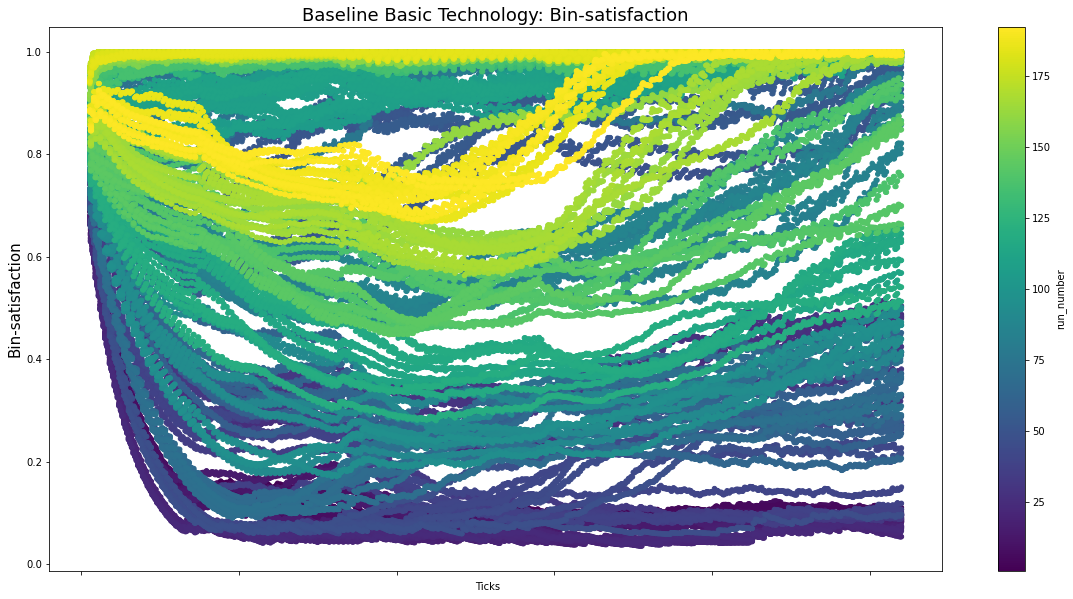

In [33]:
# Creating a plot of all runs for the baseline scenario with the BASIC technology in place
ax = bline_BASIC.plot.scatter(x='tick',y='avg bin-satisfaction',c='run_number',colormap='viridis',figsize=(20,10))
ax.set_title("Baseline Basic Technology: Bin-satisfaction", size = 18)
ax.set_ylabel('Bin-satisfaction', size = 15)
plt.text(x=500, y=-0.05, s='Ticks') # manually since the set_xlabel does not work
plt.savefig("bline_BAS_bin-satisf")

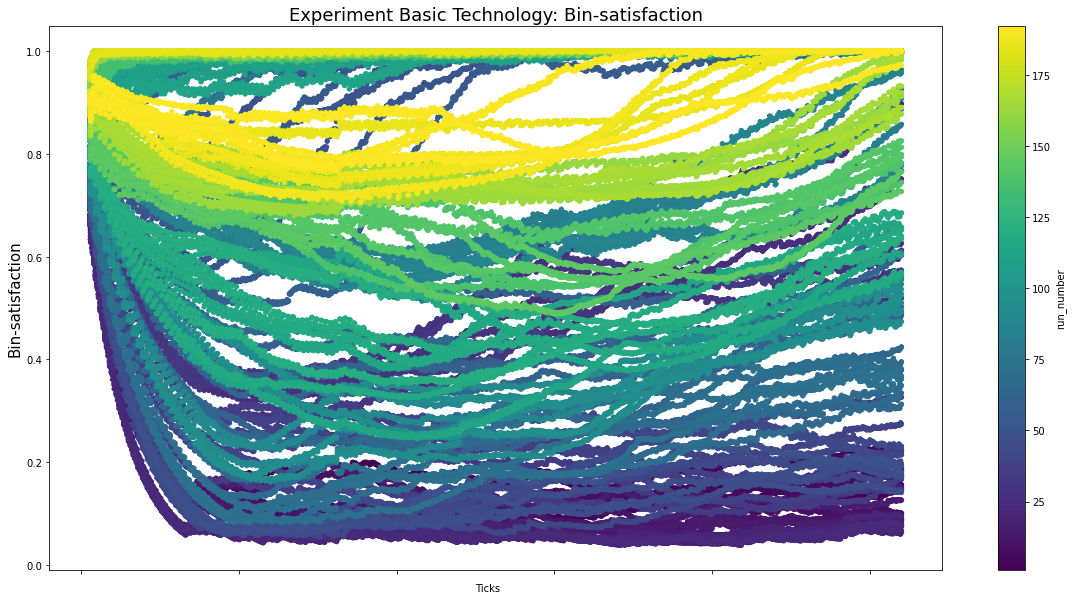

In [34]:
# Creating a plot of all runs for the Experiment with the BASIC technology in place
ax = exp_BASIC.plot.scatter(x='tick',y='avg bin-satisfaction',c='run_number',colormap='viridis',figsize=(20,10))
ax.set_title("Experiment Basic Technology: Bin-satisfaction", size = 18)
ax.set_ylabel('Bin-satisfaction', size = 15)
plt.text(x=500, y=-0.05, s='Ticks') # manually since the set_xlabel does not work
plt.savefig("exp_BAS_bin-satisf")

Plotting the recycling ratio for all 6 experiment scenario's (2 types of technology x 3 types of picking up strategies). The boxplots always remain between 6 and 10 because the maximum recycled PMD is 10% of the total, and the Waste collection company is assumed to be able to always recover 60% percent of that. 

In [35]:
# Creating separate datasets for each pick up strategy with the BASIC technology in place
exp_BASIC_pick1 = exp_BASIC[exp_BASIC['nmbr-weeks-pickup-gen'] == 1]
exp_BASIC_pick2 = exp_BASIC[exp_BASIC['nmbr-weeks-pickup-gen'] == 2]
exp_BASIC_pick3 = exp_BASIC[exp_BASIC['nmbr-weeks-pickup-gen'] == 3]

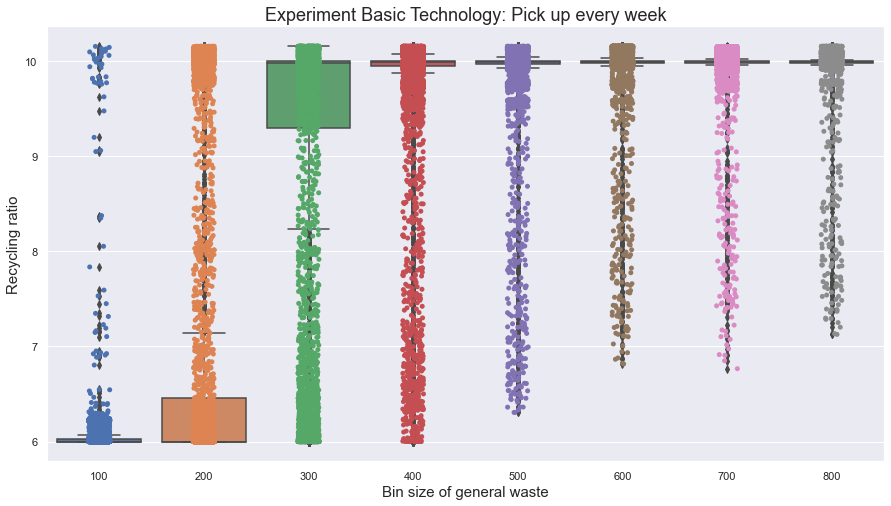

In [36]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x='general-regionbin-size',y='recycle-ratio',data=exp_BASIC_pick1)
ax = sns.stripplot(x="general-regionbin-size", y='recycle-ratio',data=exp_BASIC_pick1)
ax.set_title("Experiment Basic Technology: Pick up every week", size = 18)
ax.set_ylabel('Recycling ratio', size = 15)
ax.set_xlabel('Bin size of general waste', size= 15)
plt.savefig("exp_BAS_1week")

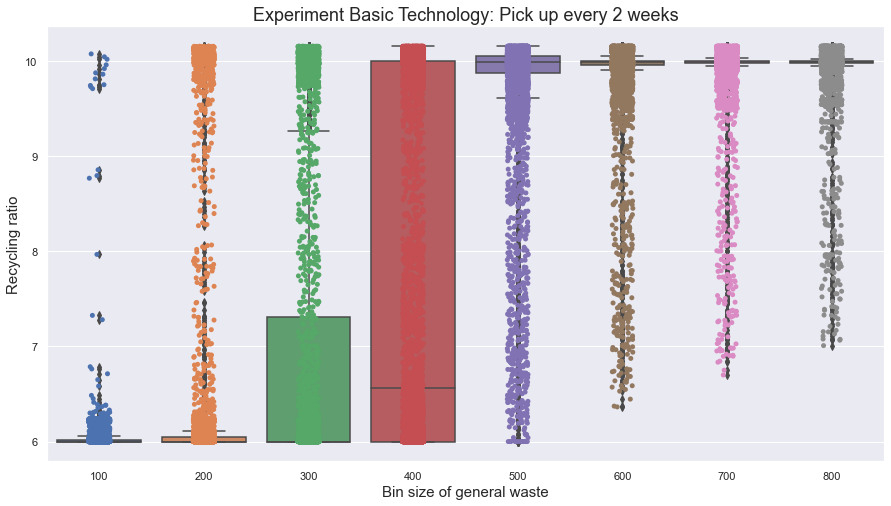

In [37]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,8)})
ax= sns.boxplot(x='general-regionbin-size',y='recycle-ratio',data=exp_BASIC_pick2)
ax = sns.stripplot(x="general-regionbin-size", y='recycle-ratio',data=exp_BASIC_pick2)
ax.set_title("Experiment Basic Technology: Pick up every 2 weeks", size = 18)
ax.set_ylabel('Recycling ratio', size = 15)
ax.set_xlabel('Bin size of general waste', size= 15)
plt.savefig("exp_BAS_2weeks")

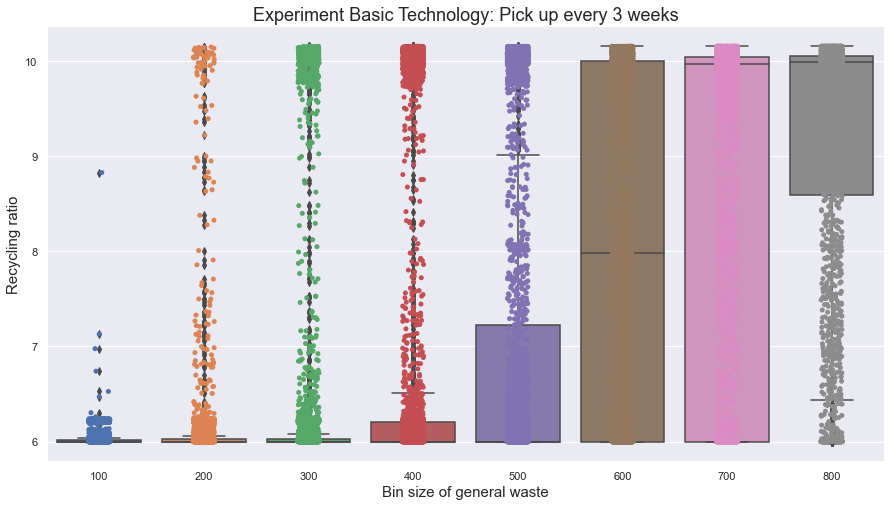

In [38]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x='general-regionbin-size',y='recycle-ratio',data=exp_BASIC_pick3)
ax = sns.stripplot(x="general-regionbin-size", y='recycle-ratio',data=exp_BASIC_pick3)
ax.set_title("Experiment Basic Technology: Pick up every 3 weeks", size = 18)
ax.set_ylabel('Recycling ratio', size = 15)
ax.set_xlabel('Bin size of general waste', size= 15)
plt.savefig("exp_BAS_3weeks")

In [39]:
# Creating separate datasets for each pick up strategy with the ADVANCED technology in place
exp_ADV_pick1 = exp_ADV[exp_ADV['nmbr-weeks-pickup-gen'] == 1]
exp_ADV_pick2 = exp_ADV[exp_ADV['nmbr-weeks-pickup-gen'] == 2]
exp_ADV_pick3 = exp_ADV[exp_ADV['nmbr-weeks-pickup-gen'] == 3]

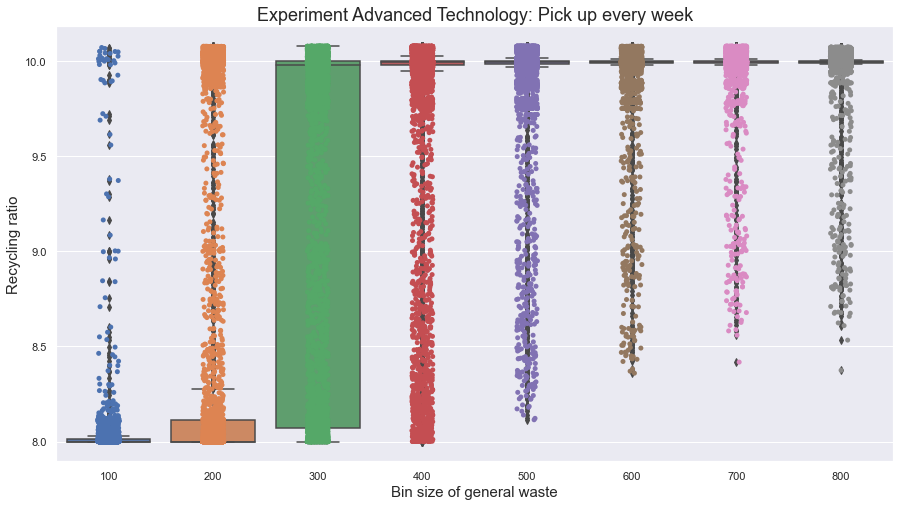

In [40]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,8)})
ax= sns.boxplot(x='general-regionbin-size',y='recycle-ratio',data=exp_ADV_pick1)
ax = sns.stripplot(x="general-regionbin-size", y='recycle-ratio',data=exp_ADV_pick1)
ax.set_title("Experiment Advanced Technology: Pick up every week", size = 18)
ax.set_ylabel('Recycling ratio', size = 15)
ax.set_xlabel('Bin size of general waste', size= 15)
plt.savefig("exp_ADV_1weeks")

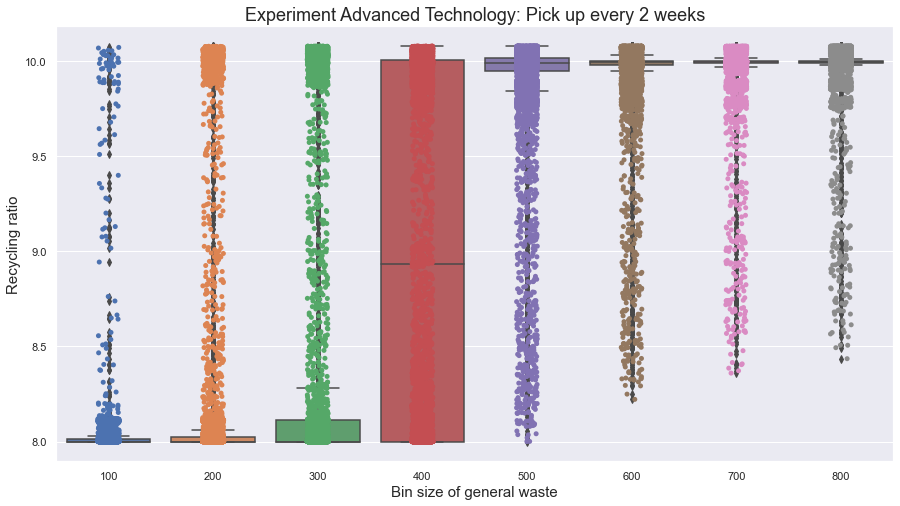

In [41]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,8)})
ax= sns.boxplot(x='general-regionbin-size',y='recycle-ratio',data=exp_ADV_pick2)
ax = sns.stripplot(x="general-regionbin-size", y='recycle-ratio',data=exp_ADV_pick2)
ax.set_title("Experiment Advanced Technology: Pick up every 2 weeks", size = 18)
ax.set_ylabel('Recycling ratio', size = 15)
ax.set_xlabel('Bin size of general waste', size= 15)
plt.savefig("exp_ADV_2weeks")

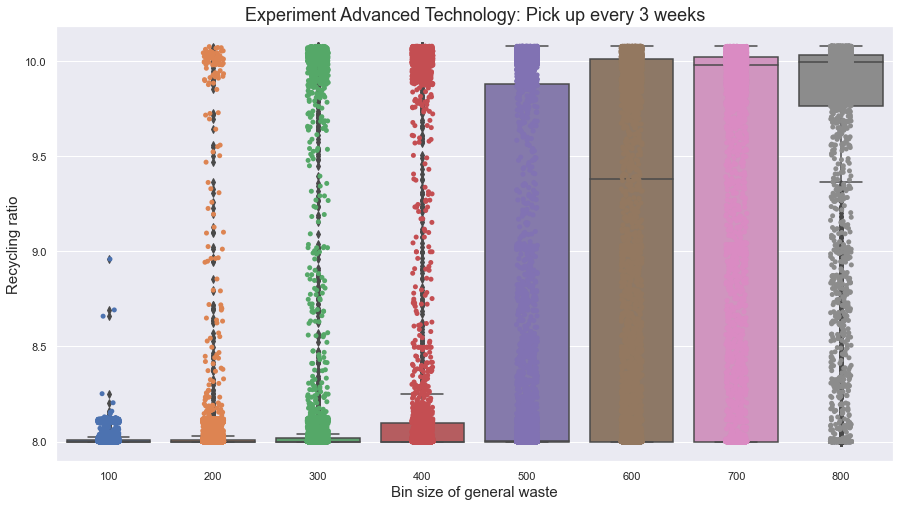

In [42]:
sns.set_style('whitegrid')
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x='general-regionbin-size',y='recycle-ratio',data=exp_ADV_pick3)
ax = sns.stripplot(x="general-regionbin-size", y='recycle-ratio',data=exp_ADV_pick3)
ax.set_title("Experiment Advanced Technology: Pick up every 3 weeks" , size =18)
ax.set_ylabel('Recycling ratio', size = 15)
ax.set_xlabel('Bin size of general waste', size= 15)
plt.savefig("exp_ADV_3weeks")

You can see that for each scenario the bins have to be at least 300 kg in size otherwise the recycling ratio does not increase.  

In [43]:
bline_BASIC_pick1 = bline_BASIC[bline_BASIC['nmbr-weeks-pickup-gen'] == 1]
bline_BASIC_pick2 = bline_BASIC[bline_BASIC['nmbr-weeks-pickup-gen'] == 2]
bline_BASIC_pick3 = bline_BASIC[bline_BASIC['nmbr-weeks-pickup-gen'] == 3]

In [44]:
bline_ADV_pick1 = bline_ADV[bline_ADV['nmbr-weeks-pickup-gen'] == 1]
bline_ADV_pick2 = bline_ADV[bline_ADV['nmbr-weeks-pickup-gen'] == 2]
bline_ADV_pick3 = bline_ADV[bline_ADV['nmbr-weeks-pickup-gen'] == 3]

In [51]:
exp_BASIC.describe()

,run_number,nmbr-weeks-pickup-pmd,general-regionbin-size,number-of-households,nmbr-weeks-pickup-gen,pmd-regionbin-size,tick,avg bin-satisfaction,recycle-ratio,average-r
count,197760.000000,197760.0,197760.000000,197760.0,197760.000000,197760.0,197760.000,197760.000000,197760.000000,197760.000000
mean,96.500000,2.0,450.000000,26.0,2.000000,200.0,525.500,0.652849,8.184556,1.544912
std,55.425014,0.0,229.129364,0.0,0.816499,0.0,297.336,0.350256,1.942398,0.071345
min,1.000000,2.0,100.000000,26.0,1.000000,200.0,11.000,0.038683,6.000000,1.357692
25%,48.750000,2.0,275.000000,26.0,1.000000,200.0,268.000,0.314864,6.000000,1.496154
50%,96.500000,2.0,450.000000,26.0,2.000000,200.0,525.500,0.739896,9.754017,1.546154
75%,144.250000,2.0,625.000000,26.0,3.000000,200.0,783.000,0.999904,9.997038,1.596154
max,192.000000,2.0,800.000000,26.0,3.000000,200.0,1040.000,1.000000,10.157999,1.719231


In [50]:
bline_BASIC.describe()

,run_number,nmbr-weeks-pickup-pmd,general-regionbin-size,number-of-households,nmbr-weeks-pickup-gen,pmd-regionbin-size,tick,recycle-ratio,avg bin-satisfaction,average-r
count,197760.000000,197760.0,197760.000000,197760.0,197760.000000,197760.0,197760.000,1.977600e+05,197760.000000,197760.000000
mean,96.500000,2.0,450.000000,26.0,2.000000,200.0,525.500,6.000000e+00,0.624167,1.541206
std,55.425014,0.0,229.129364,0.0,0.816499,0.0,297.336,6.411790e-16,0.355131,0.069847
min,1.000000,2.0,100.000000,26.0,1.000000,200.0,11.000,6.000000e+00,0.035442,1.326923
25%,48.750000,2.0,275.000000,26.0,1.000000,200.0,268.000,6.000000e+00,0.285730,1.484615
50%,96.500000,2.0,450.000000,26.0,2.000000,200.0,525.500,6.000000e+00,0.692707,1.542308
75%,144.250000,2.0,625.000000,26.0,3.000000,200.0,783.000,6.000000e+00,0.989529,1.588462
max,192.000000,2.0,800.000000,26.0,3.000000,200.0,1040.000,6.000000e+00,1.000000,1.711538


In [45]:
#t-test for the baseline compared to experiment with the BASIC technology in place
dif_BASIC = stats.ttest_ind(bline_BASIC['recycle-ratio'], exp_BASIC['recycle-ratio'])
print(dif_BASIC)

Ttest_indResult(statistic=-500.14307835886274, pvalue=0.0)


In [53]:
exp_ADV.describe()

,run_number,nmbr-weeks-pickup-pmd,general-regionbin-size,number-of-households,nmbr-weeks-pickup-gen,pmd-regionbin-size,tick,avg bin-satisfaction,recycle-ratio,average-r
count,197760.000000,197760.0,197760.000000,197760.0,197760.000000,197760.0,197760.000,197760.000000,197760.000000,197760.000000
mean,288.500000,2.0,450.000000,26.0,2.000000,200.0,525.500,0.649639,9.085745,1.560937
std,55.425014,0.0,229.129364,0.0,0.816499,0.0,297.336,0.351178,0.971831,0.065167
min,193.000000,2.0,100.000000,26.0,1.000000,200.0,11.000,0.033522,8.000000,1.415385
25%,240.750000,2.0,275.000000,26.0,1.000000,200.0,268.000,0.299513,8.000000,1.511538
50%,288.500000,2.0,450.000000,26.0,2.000000,200.0,525.500,0.736193,9.873341,1.559615
75%,336.250000,2.0,625.000000,26.0,3.000000,200.0,783.000,0.999904,9.998286,1.608654
max,384.000000,2.0,800.000000,26.0,3.000000,200.0,1040.000,1.000000,10.078997,1.773077


In [52]:
bline_ADV.describe()

,run_number,nmbr-weeks-pickup-pmd,general-regionbin-size,number-of-households,nmbr-weeks-pickup-gen,pmd-regionbin-size,tick,recycle-ratio,avg bin-satisfaction,average-r
count,197760.000000,197760.0,197760.000000,197760.0,197760.000000,197760.0,197760.000,1.977600e+05,197760.000000,197760.000000
mean,288.500000,2.0,450.000000,26.0,2.000000,200.0,525.500,8.000000e+00,0.618618,1.560377
std,55.425014,0.0,229.129364,0.0,0.816499,0.0,297.336,1.253553e-15,0.356522,0.068166
min,193.000000,2.0,100.000000,26.0,1.000000,200.0,11.000,8.000000e+00,0.036367,1.357692
25%,240.750000,2.0,275.000000,26.0,1.000000,200.0,268.000,8.000000e+00,0.265957,1.518269
50%,288.500000,2.0,450.000000,26.0,2.000000,200.0,525.500,8.000000e+00,0.689252,1.565385
75%,336.250000,2.0,625.000000,26.0,3.000000,200.0,783.000,8.000000e+00,0.988462,1.597115
max,384.000000,2.0,800.000000,26.0,3.000000,200.0,1040.000,8.000000e+00,1.000000,1.738462


In [46]:
#t-test for the baseline compared to experiment with the ADVANCED technology in place
dif_ADV = stats.ttest_ind(bline_ADV['recycle-ratio'], exp_ADV['recycle-ratio'])
print(dif_ADV)

Ttest_indResult(statistic=-496.82787042800055, pvalue=0.0)


Text(0.5, 0, 'recycle-ratio')

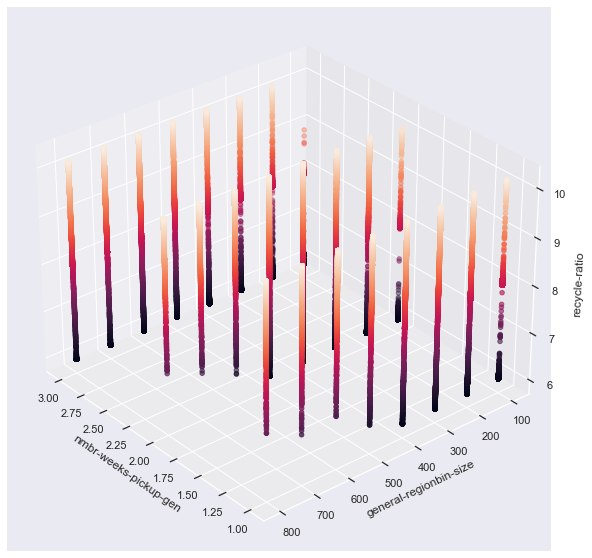

In [47]:
#Additional plot, NOT USED
exp_3d_plot = plt.figure(figsize=(10,10)).gca(projection='3d')
exp_3d_plot.scatter(experiment_data['nmbr-weeks-pickup-gen'], experiment_data['general-regionbin-size'],experiment_data['recycle-ratio'], c=experiment_data['recycle-ratio'])
exp_3d_plot.view_init(30,140)
exp_3d_plot.set_xlabel('nmbr-weeks-pickup-gen')
exp_3d_plot.set_ylabel('general-regionbin-size')
exp_3d_plot.set_zlabel('recycle-ratio')

Text(0.5, 0, 'avg bin-satisfaction')

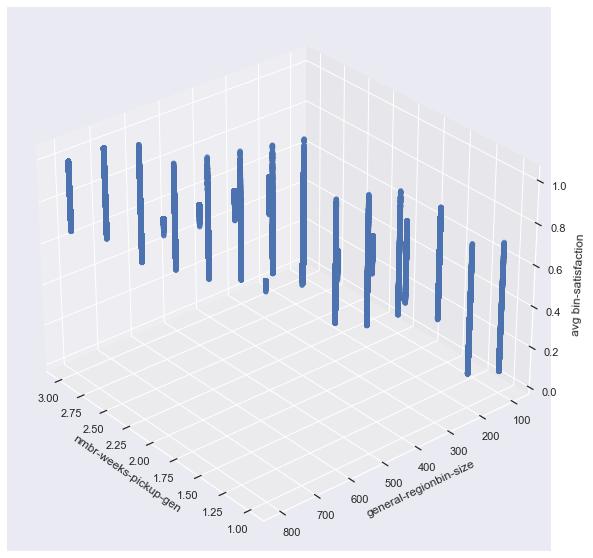

In [48]:
# ADDITIONAL PLOT, NOT USED
threedp_plot = plt.figure(figsize=(10,10)).gca(projection='3d')
threedp_plot.scatter(baseline_data['nmbr-weeks-pickup-gen'],baseline_data['general-regionbin-size'], baseline_data['avg bin-satisfaction'])
threedp_plot.view_init(30,140)
threedp_plot.set_xlabel('nmbr-weeks-pickup-gen')
threedp_plot.set_ylabel('general-regionbin-size')
threedp_plot.set_zlabel('avg bin-satisfaction')